In [45]:
# importing the libraries pertinant to data cleaning and then Regression modelling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# importing the dataset
OGdataset = pd.read_csv('y11_WholeSchool_data.csv')
dataset=OGdataset.iloc[:156,:]
dataset = dataset.fillna("NDA")
dataset.shape  # checking the shape for future processing

(156, 85)

### Categoriing SEN codes

In [47]:
#working out how many codes apparent in the feaure
dataset['SEN: 2018: SEN code:E,M,K,S,W'].value_counts()

NDA    120
K       31
E        5
Name: SEN: 2018: SEN code:E,M,K,S,W, dtype: int64

In [48]:
# create dummy vars with prefix
dummiesSEN = pd.get_dummies(dataset['SEN: 2018: SEN code:E,M,K,S,W'], prefix='SEN_code').iloc[:, 1:]

In [49]:
len(dataset.columns)

85

In [50]:
# creating a copy dataset and merging new dummiesSEN dataset to original into a "merged" 
# dropping the existing text based SEN to reduce clutter and redundancy
merged = dummiesSEN

### Categorising Context Groups High-Mid-Lower

In [51]:
dataset['Context Groups: Most recent: Raise Online groups'].value_counts()

Middle    71
High      51
Low       28
NDA        6
Name: Context Groups: Most recent: Raise Online groups, dtype: int64

In [52]:
#this also drops a column for dummy trap
dummiesCtxtGrps = pd.get_dummies(dataset['Context Groups: Most recent: Raise Online groups'], prefix='contxt_Raise').iloc[:, 1:]
merged = pd.concat([dummiesCtxtGrps,merged],axis="columns")


### Categorsing Pupil Premium

In [53]:
dataset['Context Groups: 2018: Pupil Premium Indicator'].value_counts()

Yes    99
No     57
Name: Context Groups: 2018: Pupil Premium Indicator, dtype: int64

In [54]:
#  we use the CAT function here as there are clearly only 2 values
# var dataset["Context Groups: 2018: Pupil Premium Indicator_cat"] is then copied to merged dataset
dataset["Context Groups: 2018: Pupil Premium Indicator"] = dataset["Context Groups: 2018: Pupil Premium Indicator"].astype('category')
dataset["Context Groups: 2018: Pupil Premium Indicator_cat"] = dataset["Context Groups: 2018: Pupil Premium Indicator"].cat.codes
merged = pd.concat([dataset["Context Groups: 2018: Pupil Premium Indicator_cat"],merged],axis="columns")

### Categorsing  by Sex

In [55]:
dataset['Context Groups: Most recent: Sex'].value_counts()

F    81
M    75
Name: Context Groups: Most recent: Sex, dtype: int64

In [56]:
#  we use the CAT function here as there are clearly only 2 values
#  the categorised variable is then copied to merged dataset
dataset["Context Groups: Most recent: Sex"] = dataset["Context Groups: Most recent: Sex"].astype('category')
dataset["Context Groups: Most recent: Sex_cat"] = dataset["Context Groups: Most recent: Sex"].cat.codes
merged = pd.concat([dataset["Context Groups: Most recent: Sex_cat"],merged],axis="columns")
merged.head()

,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0
3,1,1,0,0,0,0,1
4,0,1,0,0,0,0,1


### Categorising FSM

In [57]:
dataset["Demographic: Most recent: FSM"].value_counts()

No     95
Yes    61
Name: Demographic: Most recent: FSM, dtype: int64

In [58]:
#  we use the CAT function here as there are clearly only 2 values
#  the categorised variable is then copied to merged dataset
dataset["Demographic: Most recent: FSM"] = dataset["Demographic: Most recent: FSM"].astype('category')
dataset["Demographic: FSM_cat"] = dataset["Demographic: Most recent: FSM"].cat.codes
merged = pd.concat([dataset["Demographic: FSM_cat"],merged],axis="columns")
merged.head()

,Demographic: FSM_cat,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0
3,0,1,1,0,0,0,0,1
4,0,0,1,0,0,0,0,1


In [59]:
# a quick check on columns of merged dataset
merged.columns

Index(['Demographic: FSM_cat', 'Context Groups: Most recent: Sex_cat',
       'Context Groups: 2018: Pupil Premium Indicator_cat', 'contxt_Raise_Low',
       'contxt_Raise_Middle', 'contxt_Raise_NDA', 'SEN_code_K',
       'SEN_code_NDA'],
      dtype='object')

### Converting KS2 results into strings with weighting

In [60]:
# Our issue here is that the Key Stage 2 results are in the format "4a - 4b - 4c"
# thi clearly limits us from performing calculations and regression analysis

In [61]:
# converting 4+,4,4- to floats to be mapped against 9-1 grading
#  KS2 'English Reading Prior Attainment', 'KS2 Maths Prior Attainment'
# so we are turning the first index of the "4a" which is 4 into an int and then adding 0.75 to it
for i in range(0, len(dataset['KS2 English Reading Prior Attainment'])):
    if ('a') in dataset['KS2 English Reading Prior Attainment'].iloc[i]:
        dataset['KS2 English Reading Prior Attainment'].iloc[i] = int(dataset['KS2 English Reading Prior Attainment'].iloc[i][0]) + 0.75
    elif ('c') in dataset['KS2 English Reading Prior Attainment'].iloc[i]:
        dataset['KS2 English Reading Prior Attainment'].iloc[i] = int(dataset['KS2 English Reading Prior Attainment'].iloc[i][0]) + 0.25
    else:
        dataset['KS2 English Reading Prior Attainment'].iloc[i] = int(dataset['KS2 English Reading Prior Attainment'].iloc[i][0])
        
for i in range(0, len(dataset['KS2 Maths Prior Attainment'])):
    if ('a') in dataset['KS2 Maths Prior Attainment'].iloc[i]:
        dataset['KS2 Maths Prior Attainment'].iloc[i] = int(dataset['KS2 Maths Prior Attainment'].iloc[i][0]) + 0.75
    elif ('c') in dataset['KS2 Maths Prior Attainment'].iloc[i]:
        dataset['KS2 Maths Prior Attainment'].iloc[i] = int(dataset['KS2 Maths Prior Attainment'].iloc[i][0]) + 0.25
    else:
        dataset['KS2 Maths Prior Attainment'].iloc[i] = int(dataset['KS2 Maths Prior Attainment'].iloc[i][0])

C:\Users\Demetrios\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
# new we add the converted feautures to the merged dataset
merged = pd.concat([dataset["KS2 English Reading Prior Attainment"],merged],axis="columns")
merged = pd.concat([dataset["KS2 Maths Prior Attainment"],merged],axis="columns")
merged.head()

,KS2 Maths Prior Attainment,KS2 English Reading Prior Attainment,Demographic: FSM_cat,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,3.75,4.25,0,0,1,1,0,0,1,0
1,4.75,5.25,0,0,0,0,0,0,0,1
2,5,5,0,1,0,0,0,0,1,0
3,5,5,0,1,1,0,0,0,0,1
4,5.25,5.25,0,0,1,0,0,0,0,1


In [63]:
# Categorising the results "4+ Both Maths and Eng" and concatenating to the merged dataset
dataset["4+ Both Maths and Eng"] = dataset["4+ Both Maths and Eng"].astype('category')
dataset["4+ Both Maths and Eng_Cat"] = dataset["4+ Both Maths and Eng"].cat.codes
merged = pd.concat([dataset["4+ Both Maths and Eng_Cat"],merged],axis="columns")
merged.head()

,4+ Both Maths and Eng_Cat,KS2 Maths Prior Attainment,KS2 English Reading Prior Attainment,Demographic: FSM_cat,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,0,3.75,4.25,0,0,1,1,0,0,1,0
1,0,4.75,5.25,0,0,0,0,0,0,0,1
2,1,5,5,0,1,0,0,0,0,1,0
3,1,5,5,0,1,1,0,0,0,0,1
4,1,5.25,5.25,0,0,1,0,0,0,0,1


In [64]:
# categorising the results and concatenating to the merged dataset
dataset["5+ Both Maths and Eng"] = dataset["5+ Both Maths and Eng"].astype('category')
dataset["5+ Both Maths and Eng_Cat"] = dataset["5+ Both Maths and Eng"].cat.codes
merged = pd.concat([dataset["5+ Both Maths and Eng_Cat"],merged],axis="columns")
merged.head()

,5+ Both Maths and Eng_Cat,4+ Both Maths and Eng_Cat,KS2 Maths Prior Attainment,KS2 English Reading Prior Attainment,Demographic: FSM_cat,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,0,0,3.75,4.25,0,0,1,1,0,0,1,0
1,0,0,4.75,5.25,0,0,0,0,0,0,0,1
2,1,1,5,5,0,1,0,0,0,0,1,0
3,1,1,5,5,0,1,1,0,0,0,0,1
4,1,1,5.25,5.25,0,0,1,0,0,0,0,1


In [65]:
# categorising the results and concatenating to the merged dataset
dataset['5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma']
dataset["5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma"] = dataset["5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma"].astype('category')
dataset["5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma_Cat"] = dataset["5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma"].cat.codes
merged = pd.concat([dataset["5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma_Cat"],merged],axis="columns")
merged.head()


,5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma_Cat,5+ Both Maths and Eng_Cat,4+ Both Maths and Eng_Cat,KS2 Maths Prior Attainment,KS2 English Reading Prior Attainment,Demographic: FSM_cat,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,0,0,0,3.75,4.25,0,0,1,1,0,0,1,0
1,0,0,0,4.75,5.25,0,0,0,0,0,0,0,1
2,1,1,1,5,5,0,1,0,0,0,0,1,0
3,1,1,1,5,5,0,1,1,0,0,0,0,1
4,1,1,1,5.25,5.25,0,0,1,0,0,0,0,1


In [66]:
# categorising the results and concatenating to the merged dataset
dataset['5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma']
dataset["5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma"] = dataset["5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma"].astype('category')
dataset["5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma_Cat"] = dataset["5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma"].cat.codes
merged = pd.concat([dataset["5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma_Cat"],merged],axis="columns")
merged.head()

,5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma_Cat,5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma_Cat,5+ Both Maths and Eng_Cat,4+ Both Maths and Eng_Cat,KS2 Maths Prior Attainment,KS2 English Reading Prior Attainment,Demographic: FSM_cat,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,0,0,0,0,3.75,4.25,0,0,1,1,0,0,1,0
1,0,0,0,0,4.75,5.25,0,0,0,0,0,0,0,1
2,1,1,1,1,5,5,0,1,0,0,0,0,1,0
3,1,1,1,1,5,5,0,1,1,0,0,0,0,1
4,1,1,1,1,5.25,5.25,0,0,1,0,0,0,0,1


In [67]:
# no need to process the data, we can add concat directly to the merged dataset
merged = pd.concat([dataset["Actual: Progress 8 score"],merged],axis="columns")
merged.head()

,Actual: Progress 8 score,5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma_Cat,5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma_Cat,5+ Both Maths and Eng_Cat,4+ Both Maths and Eng_Cat,KS2 Maths Prior Attainment,KS2 English Reading Prior Attainment,Demographic: FSM_cat,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,0.32,0,0,0,0,3.75,4.25,0,0,1,1,0,0,1,0
1,-1.2,0,0,0,0,4.75,5.25,0,0,0,0,0,0,0,1
2,-0.09,1,1,1,1,5,5,0,1,0,0,0,0,1,0
3,-0.41,1,1,1,1,5,5,0,1,1,0,0,0,0,1
4,0.72,1,1,1,1,5.25,5.25,0,0,1,0,0,0,0,1


In [68]:
# no need to process the data, we can add concat directly to the merged dataset
merged = pd.concat([dataset["Actual: Attainment 8 score"],merged],axis="columns")
merged.head()

,Actual: Attainment 8 score,Actual: Progress 8 score,5+ Grade 5 or above GCSE (or equiv.) inc. En & Ma_Cat,5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma_Cat,5+ Both Maths and Eng_Cat,4+ Both Maths and Eng_Cat,KS2 Maths Prior Attainment,KS2 English Reading Prior Attainment,Demographic: FSM_cat,Context Groups: Most recent: Sex_cat,Context Groups: 2018: Pupil Premium Indicator_cat,contxt_Raise_Low,contxt_Raise_Middle,contxt_Raise_NDA,SEN_code_K,SEN_code_NDA
0,3.45,0.32,0,0,0,0,3.75,4.25,0,0,1,1,0,0,1,0
1,3.8,-1.2,0,0,0,0,4.75,5.25,0,0,0,0,0,0,0,1
2,6,-0.09,1,1,1,1,5,5,0,1,0,0,0,0,1,0
3,6,-0.41,1,1,1,1,5,5,0,1,1,0,0,0,0,1
4,6.2,0.72,1,1,1,1,5.25,5.25,0,0,1,0,0,0,0,1


# Logistic Regression -
## seeing the impact features have on a student achieving 5 GCSE at grade 5+

In [70]:
# we want to see 
# y = 4+ 5 grades eng ma
X=merged.iloc[:,[7,10]].values
y=merged["5+ Grade 4 or above GCSE (or equiv.) inc. En & Ma_Cat"]

In [71]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [72]:
from sklearn.preprocessing import StandardScaler
#create obj of this class to work with it
#right now we only scale the X feature
sc_X = StandardScaler()
#fit and transform our training and test set
#We recompute X_train to scale
X_train = sc_X.fit_transform(X_train)  # we call the object sc_X and the method fit_tranform
#you have to fit the object to the training set THEN.. transform it
X_test = sc_X.transform(X_test) # dont need to fit the test set to object as its already one to the train set"""

C:\Users\Demetrios\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Demetrios\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Demetrios\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [73]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\Demetrios\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int8)

In [75]:
# making Confusion Matrix
# EVALUATE IF OUR MODEL LEARNT WELL!! CHECK CORRECT AND INCORRECT PREDS
from sklearn.metrics import confusion_matrix  # we are importing a function not a class!!
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  3],
       [ 8, 17]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


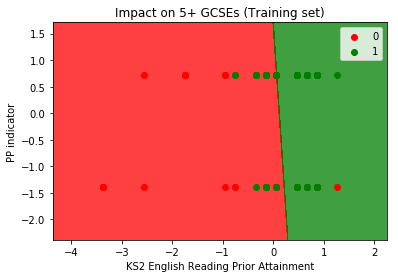

In [78]:
# Visualising the TRAINING set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Impact on 5+ GCSEs (Training set)')
plt.xlabel('KS2 English Reading Prior Attainment')
plt.ylabel('PP indicator')
plt.legend()
plt.show() 

# Multi Linear Regression

# Multi Linear Regression on all questions for their statistical importance on the Overall Grade -- the Optimal Model

In [79]:
# Using the stats model and include a constant
# creating a list from which to specify for the X axis (since we only need the dependant)


#creating a list to be addressed from merged dataset in constant function
colsofinterest =['Demographic: FSM_cat','Context Groups: Most recent: Sex_cat',
                 'Context Groups: 2018: Pupil Premium Indicator_cat','contxt_Raise_Low',
                'contxt_Raise_Middle','contxt_Raise_NDA','SEN_code_K','SEN_code_NDA']


import statsmodels.api as smm
import statsmodels.formula.api as sm

X = smm.add_constant(merged[colsofinterest]) # this must be mapped to a list type for merged
type(X)
X = np.array(X)
X = X.astype(np.int64)
y = np.array(merged['Actual: Progress 8 score'].values)
y = y.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.102
Date:                Sun, 14 Apr 2019   Prob (F-statistic):             0.0390
Time:                        19:08:19   Log-Likelihood:                -243.06
No. Observations:                 156   AIC:                             504.1
Df Residuals:                     147   BIC:                             531.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4937      0.633      0.780      0.437      -0.757       1.745
x1            -0.3652      0.237     -1.539      0.126      -0.834       0.104
x2            -0.5491      0.192     -2.861      0.005      -0.928      -0.170
x3             0.1136      0.243      0.468      0.641      -0.367       0.594
x4             0.1342      0.310      0.433      0.666      -0.479       0.747
x5             0.2763      0.223      1.238      0.218      -0.165       0.717
x6            -0.2921      0.563     -0.519      0.605      -1.405       0.821
x7            -0.3268      0.609     -0.536      0.593      -1.531       0.877
x8             0.0478      0.593      0.081      0.936      -1.125       1.220
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.512
Skew:                           0.016   Prob(JB):                        0.774
Kurtosis:                       3.279   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Backward elimination to establish features with most statistical influence

In [80]:
X_opt = X[:,[0,1,2,3,4,5,6,7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.418
Date:                Sun, 14 Apr 2019   Prob (F-statistic):             0.0226
Time:                        19:08:19   Log-Likelihood:                -243.06
No. Observations:                 156   AIC:                             502.1
Df Residuals:                     148   BIC:                             526.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5412      0.228      2.378      0.019       0.092       0.991
x1            -0.3663      0.236     -1.550      0.123      -0.833       0.101
x2            -0.5483      0.191     -2.870      0.005      -0.926      -0.171
x3             0.1138      0.242      0.470      0.639      -0.365       0.592
x4             0.1249      0.287      0.436      0.664      -0.441       0.691
x5             0.2756      0.222      1.240      0.217      -0.164       0.715
x6            -0.2950      0.560     -0.527      0.599      -1.402       0.812
x7            -0.3711      0.261     -1.423      0.157      -0.887       0.144
==============================================================================
Omnibus:                        0.881   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.507
Skew:                           0.015   Prob(JB):                        0.776
Kurtosis:                       3.278   Cond. No.                         9.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
X_opt = X[:,[0,1,2,3,5,6,7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.805
Date:                Sun, 14 Apr 2019   Prob (F-statistic):             0.0129
Time:                        19:08:19   Log-Likelihood:                -243.16
No. Observations:                 156   AIC:                             500.3
Df Residuals:                     149   BIC:                             521.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5741      0.214      2.681      0.008       0.151       0.997
x1            -0.3648      0.236     -1.548      0.124      -0.830       0.101
x2            -0.5423      0.190     -2.854      0.005      -0.918      -0.167
x3             0.1211      0.241      0.503      0.616      -0.355       0.597
x4             0.2292      0.195      1.178      0.241      -0.155       0.614
x5            -0.3540      0.542     -0.653      0.515      -1.425       0.717
x6            -0.3466      0.254     -1.365      0.174      -0.849       0.155
==============================================================================
Omnibus:                        0.888   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.513
Skew:                           0.001   Prob(JB):                        0.774
Kurtosis:                       3.281   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X_opt = X[:,[0,1,2,5,6,7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3.332
Date:                Sun, 14 Apr 2019   Prob (F-statistic):            0.00698
Time:                        19:08:27   Log-Likelihood:                -243.29
No. Observations:                 156   AIC:                             498.6
Df Residuals:                     150   BIC:                             516.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6285      0.184      3.409      0.001       0.264       0.993
x1            -0.2993      0.196     -1.528      0.129      -0.686       0.088
x2            -0.5463      0.189     -2.885      0.004      -0.920      -0.172
x3             0.2313      0.194      1.192      0.235      -0.152       0.615
x4            -0.4067      0.531     -0.767      0.445      -1.455       0.642
x5            -0.3473      0.253     -1.371      0.172      -0.848       0.153
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.494
Skew:                           0.002   Prob(JB):                        0.781
Kurtosis:                       3.276   Cond. No.                         7.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
X_opt = X[:,[0,1,2,5,7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     4.029
Date:                Sun, 14 Apr 2019   Prob (F-statistic):            0.00392
Time:                        19:08:29   Log-Likelihood:                -243.60
No. Observations:                 156   AIC:                             497.2
Df Residuals:                     151   BIC:                             512.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6115      0.183      3.346      0.001       0.250       0.973
x1            -0.2879      0.195     -1.476      0.142      -0.673       0.097
x2            -0.5558      0.189     -2.946      0.004      -0.929      -0.183
x3             0.2635      0.189      1.393      0.166      -0.110       0.637
x4            -0.4139      0.238     -1.741      0.084      -0.884       0.056
==============================================================================
Omnibus:                        0.923   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.546
Skew:                           0.037   Prob(JB):                        0.761
Kurtosis:                       3.280   Cond. No.                         3.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X_opt = X[:,[0,1,2,7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4.696
Date:                Sun, 14 Apr 2019   Prob (F-statistic):            0.00364
Time:                        19:08:32   Log-Likelihood:                -244.59
No. Observations:                 156   AIC:                             497.2
Df Residuals:                     152   BIC:                             509.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7375      0.159      4.629      0.000       0.423       1.052
x1            -0.3036      0.195     -1.555      0.122      -0.689       0.082
x2            -0.5649      0.189     -2.986      0.003      -0.939      -0.191
x3            -0.3913      0.238     -1.645      0.102      -0.861       0.079
==============================================================================
Omnibus:                        1.476   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                1.059
Skew:                           0.123   Prob(JB):                        0.589
Kurtosis:                       3.320   Cond. No.                         3.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# we can map out 
X_opt = X[:,[0,2,7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     5.782
Date:                Sun, 14 Apr 2019   Prob (F-statistic):            0.00379
Time:                        19:08:34   Log-Likelihood:                -245.82
No. Observations:                 156   AIC:                             497.6
Df Residuals:                     153   BIC:                             506.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6157      0.139      4.418      0.000       0.340       0.891
x1            -0.5389      0.189     -2.847      0.005      -0.913      -0.165
x2            -0.4388      0.237     -1.852      0.066      -0.907       0.029
==============================================================================
Omnibus:                        1.788   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.414
Skew:                           0.096   Prob(JB):                        0.493
Kurtosis:                       3.425   Cond. No.                         3.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""